In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("iou_val.json", "r") as fp:
    iou_val = json.load(fp)


ids = np.array([k for k,v in iou_val.items()])
iou = {}
for config in [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]:
    iou[config] = np.array([v[str(config)] for k,v in iou_val.items()])
    
# index = np.argsort(iou[44])

# for k in iou:
#     iou[k] = iou[k][index]

# ids = ids[index]

537053
39956
0.39999999999999997
0.8999999999999999
0.35
0.39999999999999997

0.2214673913043478
0.3333333333333333
0.7999999999999999
0.8499999999999999


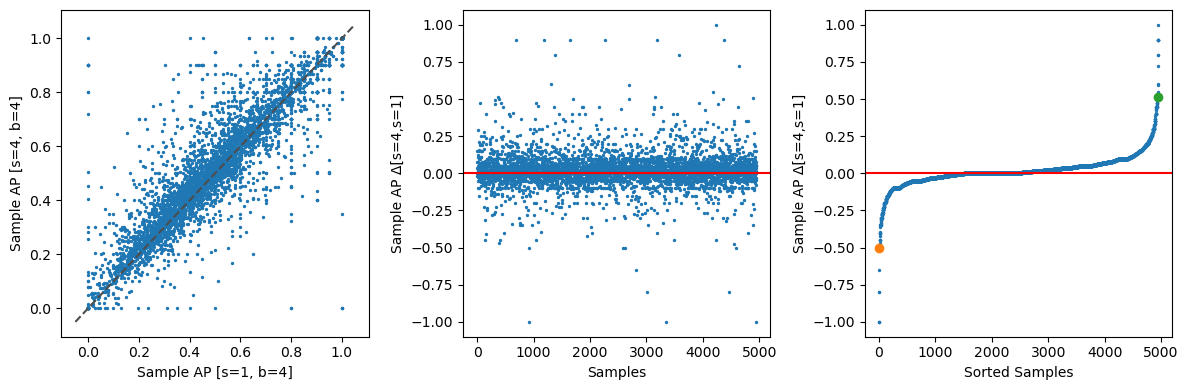

In [27]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(iou[14], iou[44], s=2)
diag_line, = ax[0].plot(ax[0].get_xlim(), ax[0].get_ylim(), ls="--", c=".3")
ax[0].set_xlabel("Sample AP [s=1, b=4]")
ax[0].set_ylabel("Sample AP [s=4, b=4]")


ax[1].scatter(range(len(iou[44])), iou[44]-iou[14], s=2)
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set_xlabel("Samples")
ax[1].set_ylabel("Sample AP Δ[s=4,s=1]")

n1 = 8
n2 = 14


ax[2].scatter(range(len(iou[44])), np.sort(iou[44]-iou[14]), s=2)
ax[2].axhline(y=0, color='r', linestyle='-')
ax[2].set_xlabel("Sorted Samples")
ax[2].set_ylabel("Sample AP Δ[s=4,s=1]")
ax[2].scatter(n1, np.sort(iou[44]-iou[14])[n1])
ax[2].scatter(len(ids)-n2, np.sort(iou[44]-iou[14])[len(ids)-n2])

f.tight_layout()
plt.savefig("sample_ap_size.pdf", dpi=500, bbox_inches='tight')

order = np.argsort(iou[44]-iou[14])
print(ids[order][n1])
print(ids[order][-n2])

print(iou[11][order][n1])
print(iou[14][order][n1])
print(iou[41][order][n1])
print(iou[44][order][n1])
print()
print(iou[11][order][-n2])
print(iou[14][order][-n2])
print(iou[41][order][-n2])
print(iou[44][order][-n2])


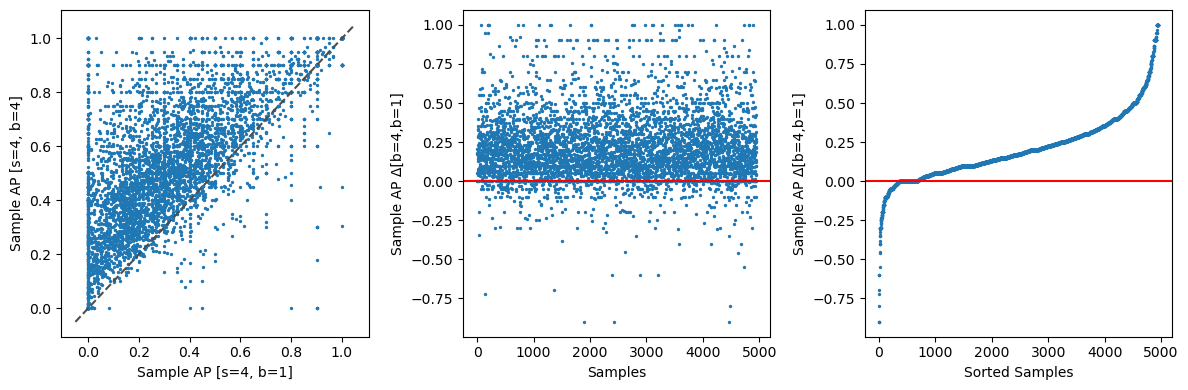

In [3]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(iou[41], iou[44], s=2)
diag_line, = ax[0].plot(ax[0].get_xlim(), ax[0].get_ylim(), ls="--", c=".3")
ax[0].set_xlabel("Sample AP [s=4, b=1]")
ax[0].set_ylabel("Sample AP [s=4, b=4]")

ax[1].scatter(range(len(iou[44])), iou[44]-iou[41], s=2)
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set_xlabel("Samples")
ax[1].set_ylabel("Sample AP Δ[b=4,b=1]")

ax[2].scatter(range(len(iou[44])), np.sort(iou[44]-iou[41]), s=2)
ax[2].axhline(y=0, color='r', linestyle='-')
ax[2].set_xlabel("Sorted Samples")
ax[2].set_ylabel("Sample AP Δ[b=4,b=1]")

f.tight_layout()
plt.savefig("sample_ap_bandwidth.pdf", dpi=500, bbox_inches='tight')

# Flexible Quantization

0     0.165838
1     0.195689
2     0.222338
3     0.250854
4     0.271354
5     0.284156
6     0.302894
7     0.322299
8     0.332986
9     0.339684
10    0.350572
11    0.361851
12    0.368051
Name: 0, dtype: float64


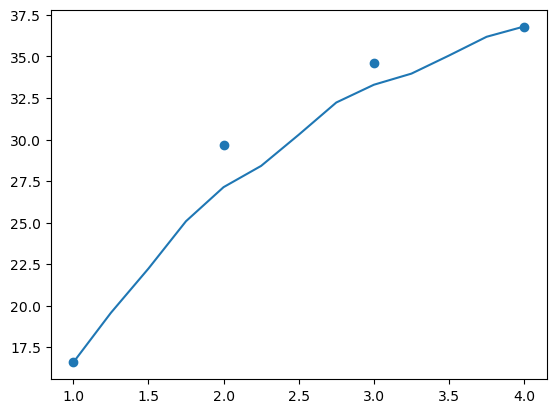

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("results_dynamic_bitrate.csv", header=None, delimiter=" ")
# print(df)
print(df.iloc[:, 0])
configurable = np.array([ [1.0, 16.6], [2.0, 29.7], [3.0, 34.6], [4.0, 36.8]]).T

plt.plot(df.iloc[:, 1], df.iloc[:, 0]*100)
plt.scatter(configurable[0], configurable[1])

